In [266]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

sns.set_theme(style="darkgrid", context="notebook", palette="deep", font="Arial")


In [119]:
# read the dataset
plant_data=pd.read_csv('plant_growth_data.csv')

In [121]:
# checking the first 5 of the dataset
plant_data.head(5)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [123]:
# checking the info of the dataset
plant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [125]:
# checking the columns in the dataset
plant_data.columns

Index(['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone'],
      dtype='object')

In [127]:
# checking the shape
plant_data.shape

(193, 7)

In [129]:
# checking the datatype of the columns in the dataset
plant_data.dtypes

Soil_Type            object
Sunlight_Hours      float64
Water_Frequency      object
Fertilizer_Type      object
Temperature         float64
Humidity            float64
Growth_Milestone      int64
dtype: object

In [133]:
# checking the statistical measure of the numerical columns
round(plant_data.describe(),2)

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.00,193.00,193.00,193.0
mean,6.83,25.08,58.10,0.5
std,1.60,5.35,12.63,0.5
min,4.03,15.20,30.57,0.0
25%,5.48,20.64,49.30,0.0
50%,6.83,25.91,59.18,0.0
75%,8.24,29.76,69.10,1.0
max,9.91,34.81,79.65,1.0


In [135]:
# checking for the null values
plant_data.isna().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [139]:
# checking for duplicated value
plant_data.duplicated().sum()

0

In [140]:
# creating a variable to store the categorical and numerical columns 
cat_col=plant_data.select_dtypes(include='object').columns
num_col=plant_data.select_dtypes(include='float64').columns

 Distribution of categorical columns

In [144]:
cat_col

Index(['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'], dtype='object')

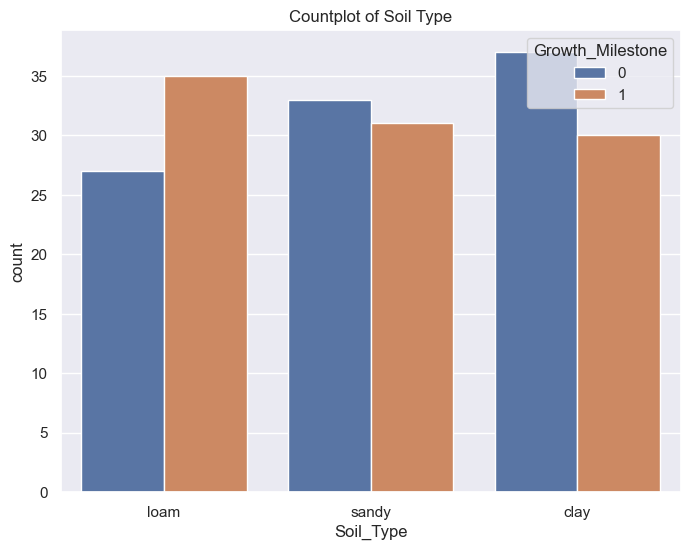

In [146]:
plt.figure(figsize=(8,6))
sns.countplot(data=plant_data,x='Soil_Type',hue="Growth_Milestone")
plt.title('Countplot of Soil Type')

plt.show()

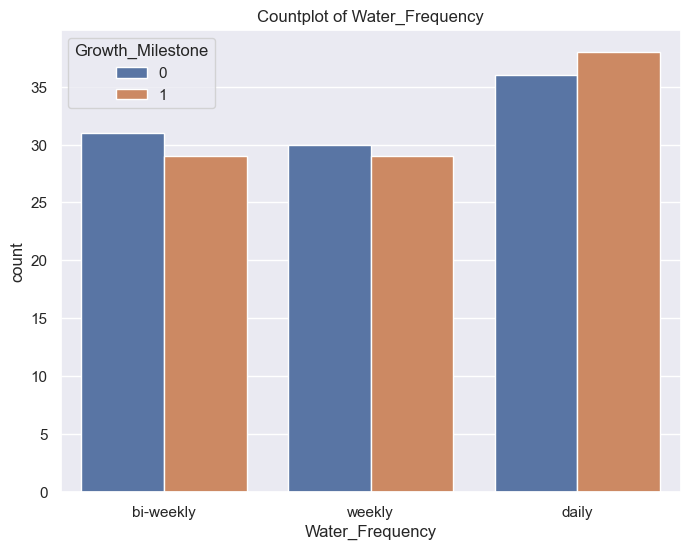

In [148]:
plt.figure(figsize=(8,6))
sns.countplot(data=plant_data,x='Water_Frequency',hue="Growth_Milestone")
plt.title('Countplot of Water_Frequency')
plt.show()

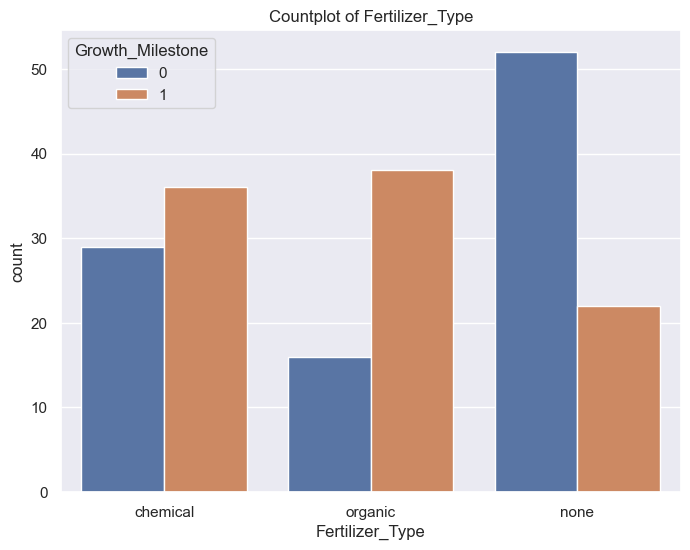

In [150]:
plt.figure(figsize=(8,6))
sns.countplot(data=plant_data,x='Fertilizer_Type',hue="Growth_Milestone")
plt.title('Countplot of Fertilizer_Type')
plt.show()

Distrribution of Numerical Column

In [153]:
num_col

Index(['Sunlight_Hours', 'Temperature', 'Humidity'], dtype='object')

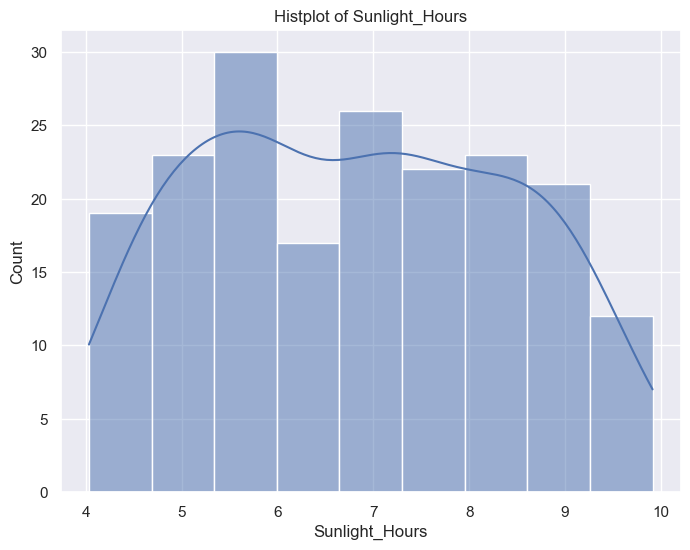

In [155]:
plt.figure(figsize=(8,6))
sns.histplot(data=plant_data,x='Sunlight_Hours',kde=True)
plt.title('Histplot of Sunlight_Hours')
plt.show()

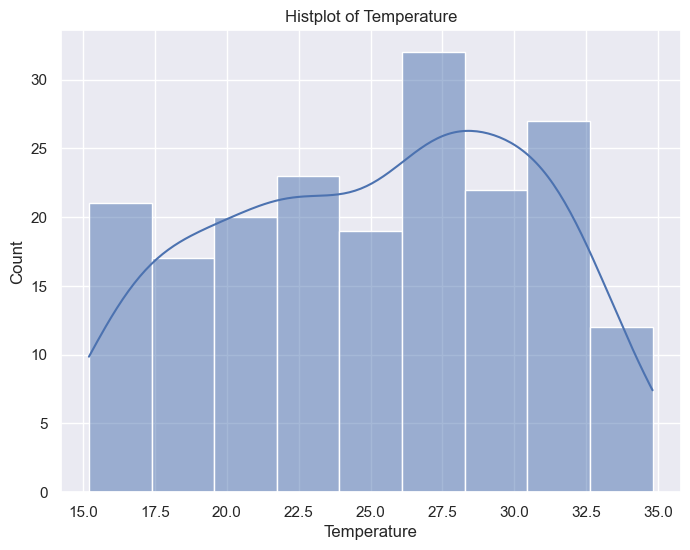

In [157]:
plt.figure(figsize=(8,6))
sns.histplot(data=plant_data,x='Temperature',kde=True)
plt.title('Histplot of Temperature')
plt.show()

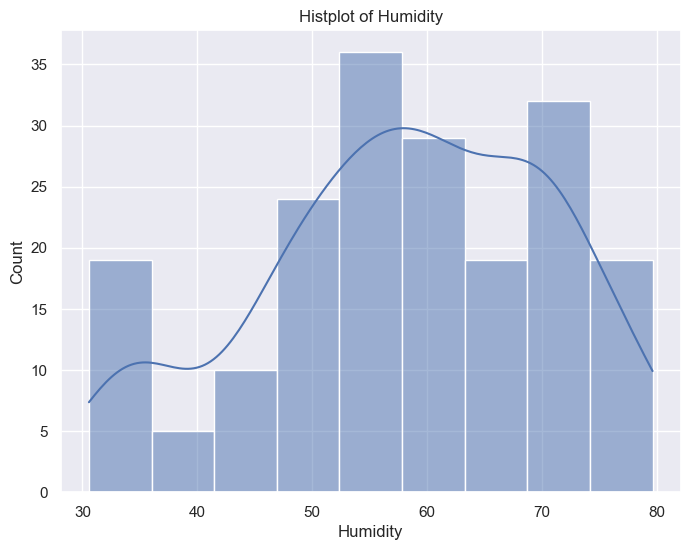

In [159]:
plt.figure(figsize=(8,6))
sns.histplot(data=plant_data,x='Humidity',kde=True)
plt.title('Histplot of Humidity')
plt.show()

Checking for outliers in the numerical columns using boxplot

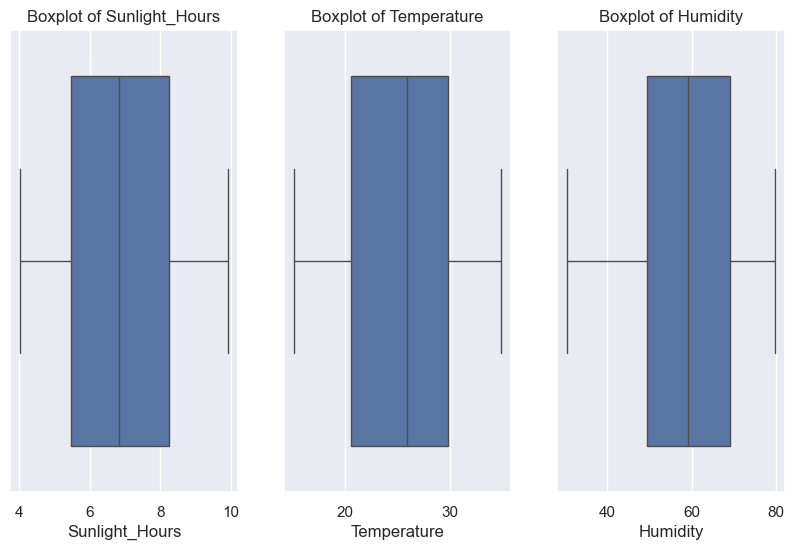

In [170]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.boxplot(data=plant_data,x='Sunlight_Hours')
plt.title('Boxplot of Sunlight_Hours')

plt.subplot(1,3,2)
sns.boxplot(data=plant_data,x='Temperature')
plt.title('Boxplot of Temperature')

plt.subplot(1,3,3)
sns.boxplot(data=plant_data,x='Humidity')
plt.title('Boxplot of Humidity')



plt.show()

Relationships between colums and the target feature using barplot


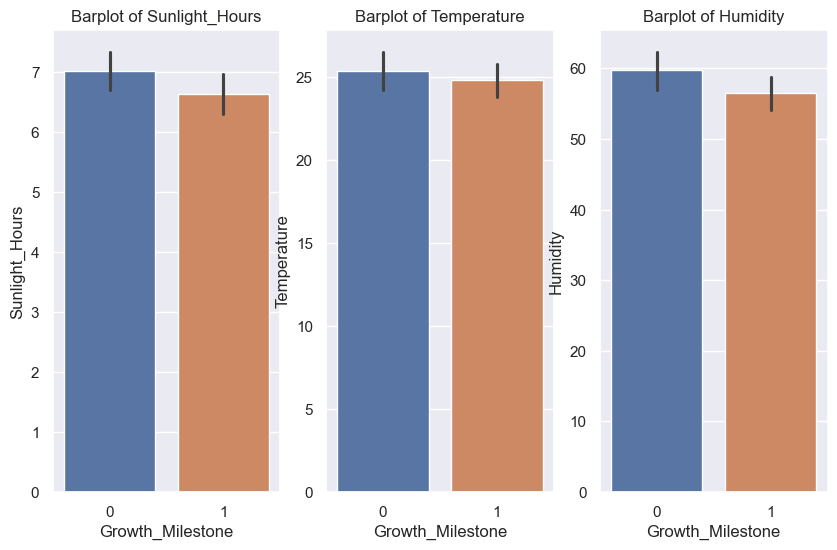

In [180]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.barplot(data=plant_data,x='Growth_Milestone',y='Sunlight_Hours',palette='deep')
plt.title('Barplot of Sunlight_Hours')

plt.subplot(1,3,2)
sns.barplot(data=plant_data,x='Growth_Milestone',y='Temperature',palette='deep')
plt.title('Barplot of Temperature')

plt.subplot(1,3,3)
sns.barplot(data=plant_data,x='Growth_Milestone',y='Humidity',palette='deep')
plt.title('Barplot of Humidity')



plt.show()

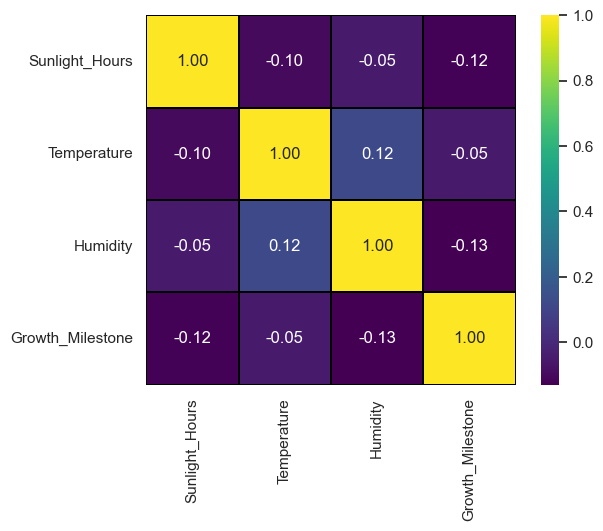

In [205]:
# correlation
sns.heatmap(plant_data.drop(columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']).corr(),annot=True,cmap='viridis',linewidths=0.1,linecolor='black',fmt='.2f',square=True)
plt.show()

Distribution of the target feature

In [208]:
plant_data['Growth_Milestone'].value_counts()

Growth_Milestone
0    97
1    96
Name: count, dtype: int64

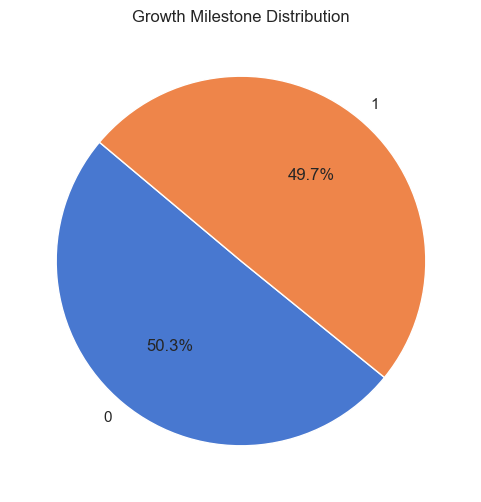

In [210]:
# visualizing the target variable using pie chart
categories=[0,1]
count=plant_data['Growth_Milestone'].value_counts().to_list()
colors=sns.color_palette('muted')
plt.figure(figsize=(6,6))
plt.pie(x=count,labels=categories,autopct='%1.1f%%',colors=colors,startangle=140)
plt.title('Growth Milestone Distribution')
plt.show()

In [214]:
cat_col

Index(['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'], dtype='object')

In [246]:
# encoding the categorical column into a numerical form


soil_dummies=pd.get_dummies(plant_data['Soil_Type'],dtype=int)
water_dummies=pd.get_dummies(plant_data['Water_Frequency'],dtype=int)
plant_dummies=pd.get_dummies(plant_data['Fertilizer_Type'],dtype=int)


In [248]:
# concantenate the new created variable to the original dataframe
plant_data=pd.concat([plant_data.drop(columns=cat_col,),soil_dummies,water_dummies,plant_dummies],axis=1)

In [250]:
plant_data.head(5)

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,clay,loam,sandy,bi-weekly,daily,weekly,chemical,none,organic
0,5.192294,31.719602,61.591861,0,0,1,0,1,0,0,1,0,0
1,4.033133,28.919484,52.422276,1,0,0,1,0,0,1,0,0,1
2,8.892769,23.179059,44.660539,0,0,1,0,1,0,0,0,1,0
3,8.241144,18.465886,46.433227,0,0,1,0,1,0,0,0,1,0
4,8.374043,18.128741,63.625923,0,0,0,1,1,0,0,0,0,1


In [252]:
# # split data into features and target
X=plant_data.drop('Growth_Milestone',axis=1)
y=plant_data['Growth_Milestone']

In [306]:
# split into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [308]:
# Standardize the feature
scaled=StandardScaler()
X_train_scale=scaled.fit_transform(X_train)
X_test_scale=scaled.transform(X_test)

In [312]:
#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']}
}

In [314]:
#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
    
}

In [316]:
#fit models using GridSearchCV for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'accuracy')
    grid_search.fit(X_train_scale, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scale)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.53      0.60        17
           1       0.69      0.82      0.75        22

    accuracy                           0.69        39
   macro avg       0.69      0.67      0.68        39
weighted avg       0.69      0.69      0.68        39

Best Parameters: {'max_depth': 12}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.47      0.44        17
           1       0.55      0.50      0.52        22

    accuracy                           0.49        39
   macro avg       0.49      0.49      0.48        39
weighted avg       0.49      0.49      0.49        39

Best Parameters: {'max_depth': 3, 'n_estimators': 100}

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.65      0.58        17
           1       0.67     

After applying all the model using different hyperparameter tuning, DecisionTreeClassifier has the highest Accuracy.

In [327]:
# fiting the best model... which is DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=12)
dt_model.fit(X_train_scale,y_train)
y_pred=dt_model.predict(X_test_scale)

In [329]:
# evaluating the model
y_pred_acc=round(accuracy_score(y_test,y_pred)*100,2)
y_pred_acc



66.67

In [341]:
# testing the model on the model
X_new=X_test.iloc[2]
X_new_scaled =scaled.transform([X_new])

In [343]:
# predicting on the new test data
dt_model.predict(X_new_scaled)

array([1], dtype=int64)

In [345]:
# checking the actual outcome
y_test.iloc[10]

1